In [1]:
import  gymnasium as gym
import torch
import random
import numpy as np
import torch.nn as nn
import torch.optim as optim
from copy import deepcopy
from tqdm import tqdm
from mem.buffer import ReplayBuffer, PrioritizedReplayBuffer
from train import Agent
from pathos.multiprocessing import ProcessingPool as Pool

In [2]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

In [3]:
parameters1 = {
        "gamma": 0.99,
        "lr": 5e-4,
        "tau": 0.01,
        "ep_num": 300,
        "batch_size": 64,
        "eps_max": 0.1,
        "eps_min": 0.05,
        "device": device,
        "env": gym.make("CartPole-v1"),
        "buffer": ReplayBuffer(state_size=4, action_size=1, buffer_size= 50_000, device = device),
        # "buffer": PrioritizedReplayBuffer(state_size=4, action_size=1,
        #                                     buffer_size= 50_000, device = device, alpha=0.7, beta=0.2)
        }
parameters2 = {
        "gamma": 0.99,
        "lr": 5e-4,
        "tau": 0.01,
        "ep_num": 300,
        "batch_size": 64,
        "eps_max": 0.1,
        "eps_min": 0.05,
        "device": device,
        "env": gym.make("CartPole-v1"),
        # "buffer": ReplayBuffer(state_size=4, action_size=1, buffer_size= 50_000, device = device),
        "buffer": PrioritizedReplayBuffer(state_size=4, action_size=1,
                                            buffer_size= 50_000, device = device, alpha=0.7, beta=0.2)
        }

In [4]:
def parallelied_run(params):
    from train import Agent
    agent = Agent(**params)
    return agent.train()

In [5]:
with Pool() as p:
    parameters_parallel = [parameters1 for i in range(10)] + [parameters2 for i in range(10)]
    rewards = p.map(parallelied_run, parameters_parallel)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

num_runs = 10
num_episodes = 300

algorithm1_rewards = rewards[:num_runs]
algorithm2_rewards = rewards[num_runs:]

# algorithm1_rewards = [i[:100] for i in algorithm1_rewards]


In [12]:
rewards_np = np.array(rewards)

In [14]:
np.save("array_rewards10-10with300episodes.txt",rewards_np)

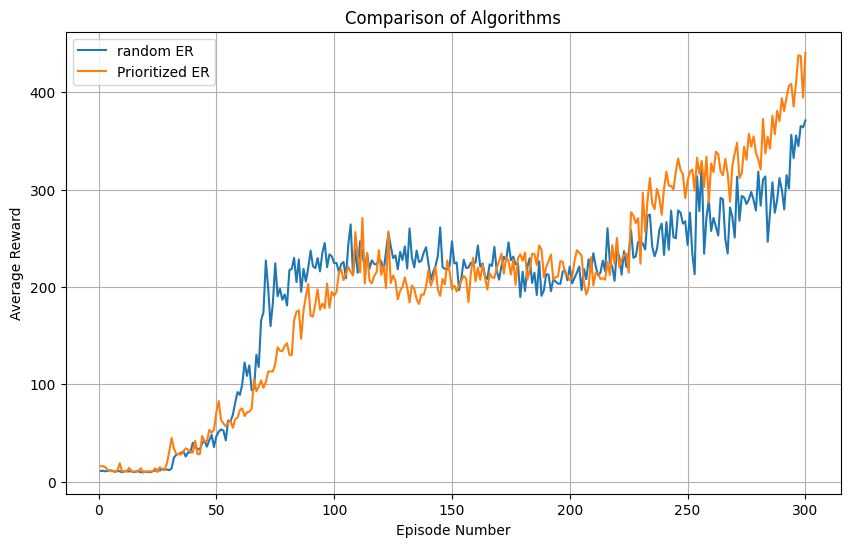

In [11]:

# Calculate average rewards for each episode
avg_algorithm1_rewards = np.mean(algorithm1_rewards, axis=0)
avg_algorithm2_rewards = np.mean(algorithm2_rewards, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_episodes + 1), avg_algorithm1_rewards, label='random ER')
plt.plot(range(1, num_episodes + 1), avg_algorithm2_rewards, label='Prioritized ER')
plt.xlabel('Episode Number')
plt.ylabel('Average Reward')
plt.title('Comparison of Algorithms')
plt.legend()
plt.grid(True)
plt.show()
